In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("amazon_review.txt", delimiter = "\t")

In [3]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [4]:
""" ___label1__ is fake review and __label2__ is the real review so the classifier is trained on 
how many of these fake reviews it can correctly detect"""


data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [5]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [6]:
len( data)

21000

In [7]:
data.shape

(21000, 9)

In [8]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
cnt_srs

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

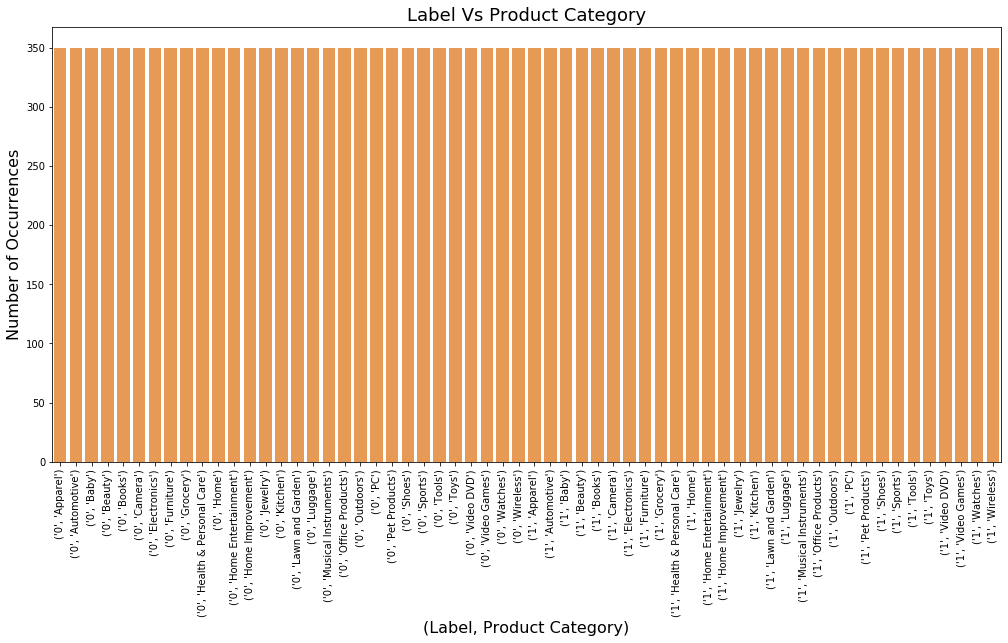

In [10]:
# plotting the data by category counts 

plt.figure(figsize=(17,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# rating vs product category 

cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()

In [12]:
cnt_srs

RATING  PRODUCT_CATEGORY  
1       Wireless              103
        Office Products        91
        PC                     84
        Lawn and Garden        77
        Electronics            74
                             ... 
5       Watches               375
        Shoes                 371
        Home Entertainment    359
        Wireless              357
        Furniture             342
Name: PRODUCT_CATEGORY, Length: 150, dtype: int64

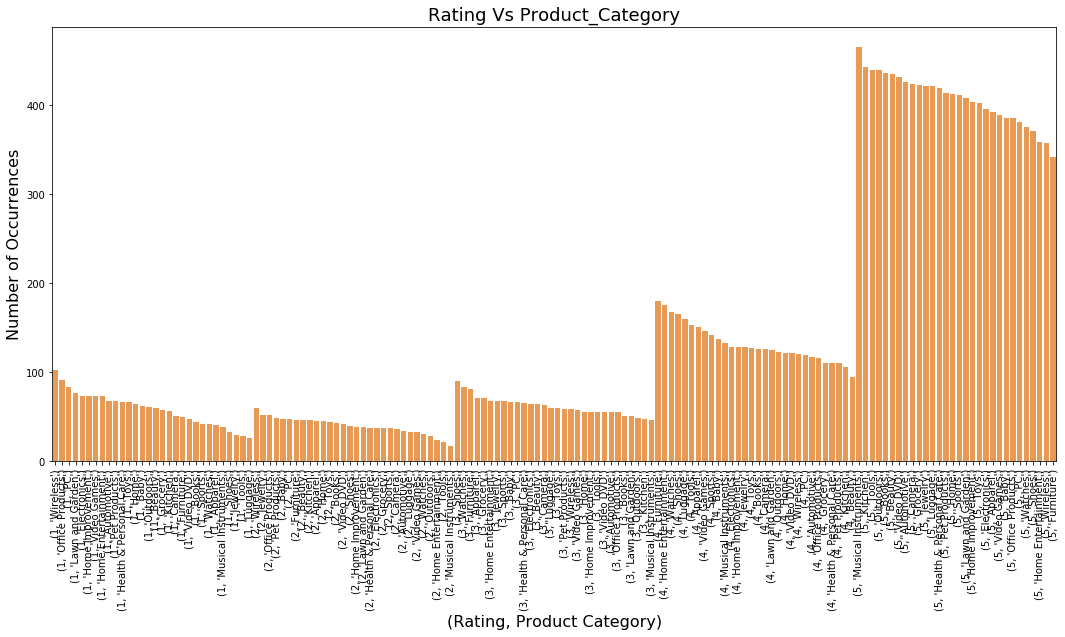

In [13]:
plt.figure(figsize=(18,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").PRODUCT_CATEGORY.value_counts()
cnt_srs

VERIFIED_PURCHASE  PRODUCT_CATEGORY      
N                  Books                     449
                   Video DVD                 436
                   Grocery                   389
                   Video Games               373
                   Baby                      370
                   Home Entertainment        366
                   Furniture                 359
                   Toys                      353
                   Tools                     330
                   Musical Instruments       329
                   Lawn and Garden           327
                   Luggage                   319
                   Watches                   309
                   Camera                    306
                   Electronics               304
                   PC                        302
                   Pet Products              299
                   Home Improvement          289
                   Office Products           289
                   Home    

In [15]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [17]:
df1.head()

0        When least you think so, this product will sav...
1        Lithium batteries are something new introduced...
2        I purchased this swing for my baby. She is 6 m...
3        I was looking for an inexpensive desk calcolat...
4        I only use it twice a week and the results are...
10500    I purchased this product to separate my credit...
10501    This is probably one of the most exciting gift...
10502    I lost my stuffed Rescue toy, and was clearly ...
10503    I LOVE these lights! Well, maybe that's too st...
10504    I ordered four more of these to go in my survi...
Name: REVIEW_TEXT, dtype: object

In [18]:
# adding a new column text length to the data base 


data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [19]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331


In [20]:
#  how the text length varies with the label 

cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

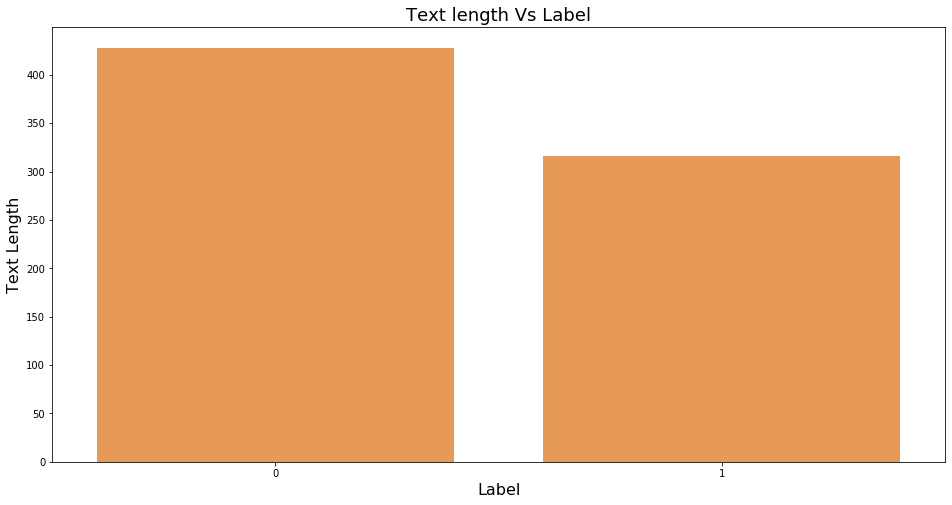

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [22]:
!pip3 install textstat 

In [23]:
import textstat 

In [24]:
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    13.803848
1     8.006648
Name: FK_Score, dtype: float64

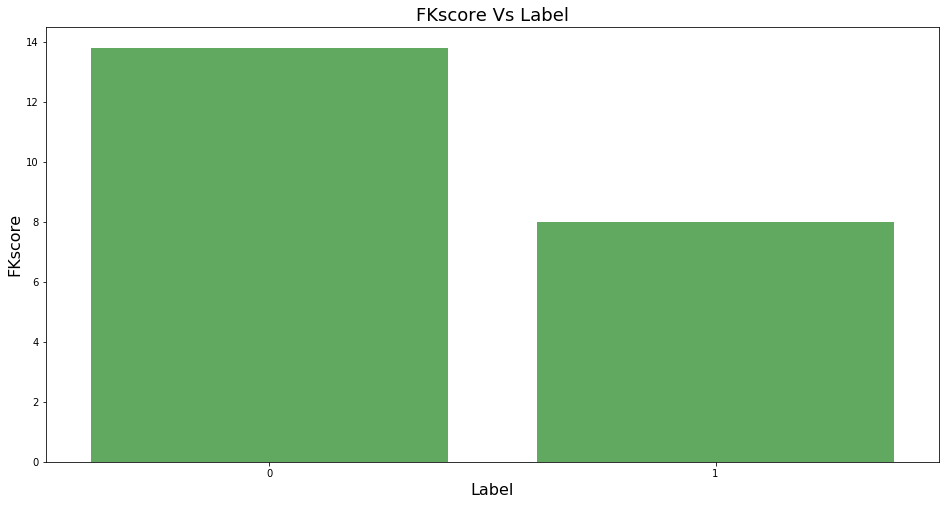

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [26]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dheerajkumarramchandani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajkumarramchandani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [28]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
# now calculatingt the stopwords in the review text 
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)

In [30]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,FK_Score,stop_count
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,1.9,10
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,15.6,28
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,2.6,25
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,4.0,18
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,8.3,34


In [31]:
cnt_srs = data.groupby(["LABEL"]).stop_count

In [32]:
cnt_srs.head()

0         10
1         28
2         25
3         18
4         34
10500     15
10501    114
10502     20
10503     21
10504      9
Name: stop_count, dtype: int64

In [33]:
""" calculating the aggregate stop count for label 1 and label 0  """
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

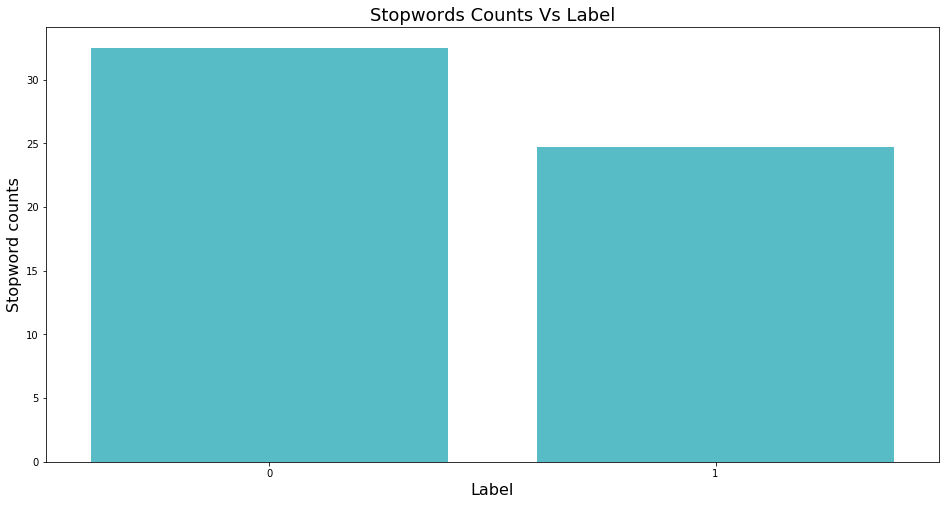

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [35]:
# =============SENTIMENT CLASSIFIER ================

In [36]:
# Rating greater than 3 is 1 and else 0

data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1

In [37]:
data['RATING'].value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [92]:
# take the data of rating 1 and 0 

data1 = data.loc[ data['RATING'] == 1]

data2 = data1.sample( frac = 0.2)

data3 = data.loc[data['RATING'] == 0]

print( len( data1))
print( len( data2))

print( len(data3))
# taking balanced set of data for postive and negative rating

16183
3237
2949


In [93]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,FK_Score,stop_count
0,11202,0,1,Y,Automotive,B009EFJBX4,LAMPHUS SolarBlast 12W LED Emergency Vehicle W...,"Nice, quality light",This light is excellent for the price. It is a...,181,1.9,12
1,8910,1,1,N,Luggage,B00SL298VQ,Genuine Leather Travel Bag Weekender Luggage C...,Waiting for such product since long,This great duffel bag is a sturdy stuff which ...,240,4.9,19
2,15960,0,1,Y,Video DVD,B00EQL4S4I,Brave Enough: Live at the Variety Playhouse,Oh yea!,This is everything you would expect and want f...,106,2.4,5
3,16276,0,1,Y,Luggage,B00NIKBI78,"San Francisco Umbrella Co, Red/Black Dachshund...",You know you need this.,"Love it! Trust me, if you're interested in thi...",189,7.2,13
4,9735,1,1,N,Tools,B005C3J1L4,"Timber Tuff TMW-11 Manual Log Splitter, Green",recommended,I have used it for the past month and I love i...,109,2.6,8


In [94]:
rawData = data4[ [ "REVIEW_TEXT", "RATING"]]
rawData.head()
print( len( rawData))

6186


In [95]:
rawData.values

array([["This light is excellent for the price. It is as bright as a Code3 LED-X. More than adequate for day time use, and I'd imagine blindingly bright at night. Well worth twice the price.",
        1],
       ['This great duffel bag is a sturdy stuff which helps me carry my little luggage when i need to travel for 1 day. The luxurious bag is with since last 6 months and i never complained about it. This is worth the price and it wont let you down.',
        1],
       ['This is everything you would expect and want from a live DVD. She sounds great live. I absolutely Love it!',
        1],
       ...,
       ["We are on our third pair in less than 2 months!  The first set the strap started to fall apart within 2 weeks.  I called Stride Rite to complain and they sent me a new pair which had a wire not stitched right so it was hanging out of the shoe.  I took those back to the store and was given a new pair and they were fine but now after only about a month the lights are going out al

In [96]:
rawData = [ tuple(x) for x in rawData.values]

In [97]:
rawData[0]

("This light is excellent for the price. It is as bright as a Code3 LED-X. More than adequate for day time use, and I'd imagine blindingly bright at night. Well worth twice the price.",
 1)

In [98]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dheerajkumarramchandani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
""" Text processing remove the spaces and punctuations and the stop words in english which does not any 
meaning to the sentence """
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        w = w.lower()
        if w not in stop_words and re.match('^[a-z]+$', w):
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [100]:
""" global dictionary of features which contains the words which appear in the sentence"""

featureDict = {} # A global dictionary of features

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
   
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [122]:
def splitData(percentage):
    dataSamples = len(rawData)
    trainData = []
    testData = []
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)), Label))
    for (Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)), Label))
    return trainData, testData

In [123]:
X_train,X_test = splitData(0.8)

In [124]:
""" this shows the frequency of each word and the label at the end"""

print( X_train[0])

({'light excellent': 1, 'excellent price': 1, 'price bright': 1, 'bright ledx': 1, 'ledx adequate': 1, 'adequate day': 1, 'day time': 1, 'time use': 1, 'use id': 1, 'id imagine': 1, 'imagine blindingly': 1, 'blindingly bright': 1, 'bright night': 1, 'night well': 1, 'well worth': 1, 'worth twice': 1, 'twice price': 1, 'light': 1, 'excellent': 1, 'price': 1, 'bright': 1, 'ledx': 1, 'adequate': 1, 'day': 1, 'time': 1, 'use': 1, 'id': 1, 'imagine': 1, 'blindingly': 1, 'night': 1, 'well': 1, 'worth': 1, 'twice': 1}, 1)


In [114]:
# cross validation on the training data set 

print( len( X_train), len( X_test))

4948 1238


In [127]:

pipeline =  Pipeline([('svc', LinearSVC(C=0.01))])
classifier = SklearnClassifier(pipeline).train(X_train)

In [129]:
# predict the test data set 
y_pred = classifier.classify_many(map(lambda t: t[0], X_test))

In [130]:
a = accuracy_score(list(map(lambda d : d[1], X_test)), y_pred)

In [131]:
a

0.8481421647819063

In [133]:
# Making it a function 

def svm_classifier( X_train, X_test, c):
    pipeline =  Pipeline([('svc', LinearSVC(C=c))])
    classifier = SklearnClassifier(pipeline).train(X_train)
    # predict the test data set 
    y_pred = classifier.classify_many(map(lambda t: t[0], X_test))
    
    a = accuracy_score(list(map(lambda d : d[1], X_test)), y_pred)
    
    print( " The accuracy of the classifier is {}".format(a))

    
    
    

In [134]:
svm_classifier( X_train, X_test, 0.01)

 The accuracy of the classifier is 0.8481421647819063


In [135]:
svm_classifier( X_train, X_test, 0.1)

 The accuracy of the classifier is 0.8529886914378029


In [136]:
svm_classifier( X_train, X_test, 0.2)

 The accuracy of the classifier is 0.8505654281098546


In [ ]:
# we can add more features to increase the accuracy of the classifier